<a href="https://colab.research.google.com/github/gg5d/DS-3005/blob/main/k_clustering_Penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [41]:
def opt_reps(X, k, assign):
    (n, d) = X.shape
    reps = np.zeros((k, d))
    for i in range(k):
        in_i = [j for j in range(n) if assign[j] == i]
        reps[i,:] = np.sum(X[in_i,:],axis=0) / len(in_i)
    return reps

def opt_clust(X, k, reps):
    (n, d) = X.shape
    dist = np.zeros(n)
    assign = np.zeros(n, dtype=int)
    for j in range(n):
        dist_to_i = np.array([LA.norm(X[j,:] - reps[i,:]) for i in range(k)])
        assign[j] = np.argmin(dist_to_i)
        dist[j] = dist_to_i[assign[j]]
    G = np.sum(dist ** 2)
    print(G)
    return assign

# This algorithm, from the book, starts with randomly assigning vectors to clusters.

In [ ]:
rng = np.random.default_rng()
def kmeans(X, k, maxiter=10):
    (n, d) = X.shape
    assign = rng.integers(0,k,n)
    reps = np.zeros((k, d), dtype=int)
    for iter in range(maxiter):
        # Step 1: Optimal representatives for fixed clusters
        reps = opt_reps(X, k, assign)
        # Step 2: Optimal clusters for fixed representatives
        assign = opt_clust(X, k, reps)
    return assign

# The following algorithm, kmeans2, starts by randomly choosing k centroids (representatives) uniformly betweek min and max values of all the features (column values)

In [80]:
def kmeans2(X, k, maxiter=20):
    (n, d) = X.shape
    #assign = np.zeros(d,dtype=int)
    reps = np.random.uniform(np.min(X),np.max(X),(k,X.shape[1]))
    for iter in range(maxiter):
        # The following steps are the same as kmeans(), just flipped.

        # Step 2: Optimal clusters for fixed representatives
        assign = opt_clust(X, k, reps)
        # Step 1: Optimal representatives for fixed clusters
        reps = opt_reps(X, k, assign)

    return assign

In [ ]:
df = pd.read_csv('penguins-measurements.csv')
df = df.dropna()
X = df[['bill_length_mm', 'bill_depth_mm',
        'flipper_length_mm', 'body_mass_g']].to_numpy()

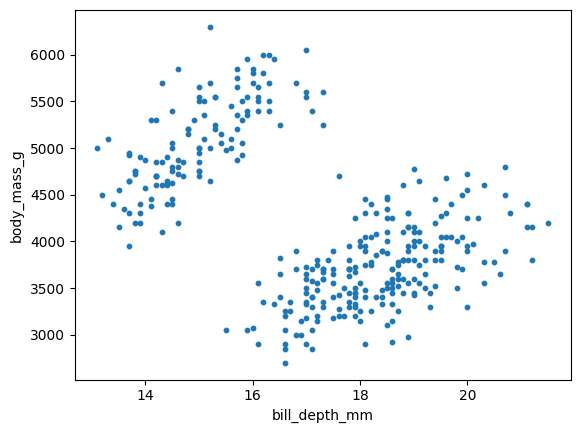

In [ ]:
plt.scatter(X[:,1], X[:,3], s=10)
plt.xlabel('bill_depth_mm')
plt.ylabel('body_mass_g')
plt.show()

We need the following step in order to normalize the values of the features and to remove dependence on units (meters vs kilometers). All values for the features should be between -3 and 3.

In [112]:
mean = np.mean(X, axis=0)  # Compute mean for each column
std = np.std(X, axis=0)  # Compute standard deviation for each column
X = (X - mean) / std # Standardize each column
X

array([[-0.88449874,  0.78544923, -1.41834665, -0.56414208],
       [-0.81112573,  0.1261879 , -1.06225022, -0.50170305],
       [-0.66437972,  0.43046236, -0.42127665, -1.18853234],
       ...,
       [ 1.18828874, -0.73592307,  1.50164406,  1.93341896],
       [ 0.23443963, -1.19233476,  0.7894512 ,  1.24658968],
       [ 1.09657248, -0.53307343,  0.86067049,  1.49634578]])

In [114]:
assign = kmeans(X, 3)
# print(assign)

1170.801411549311
597.6914381646259
552.0056679027703
523.1529535259613
481.1048979834344
391.23263154667046
381.50154717203566
381.28556847772376
381.28556847772376
381.28556847772376


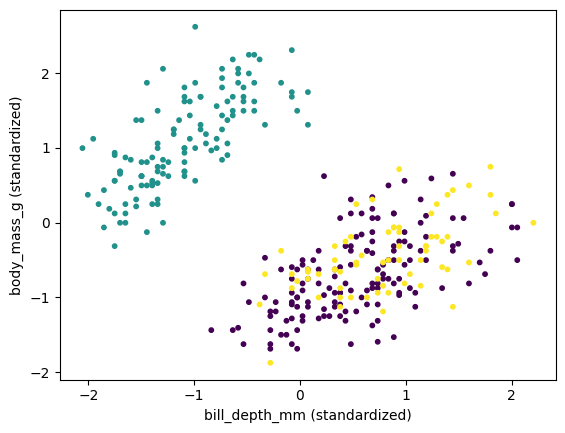

In [115]:
plt.scatter(X[:,1], X[:,3], c=assign, s=10)
plt.xlabel('bill_depth_mm (standardized)')
plt.ylabel('body_mass_g (standardized)')
plt.show()

In [118]:
assign = kmeans(X, 3)

1168.6576564977252
412.2493389248851
386.7477878323225
382.08512769635365
380.2047474835326
379.8422549698952
379.48270546982894
379.43008860093113
379.40298007128274
379.40298007128274


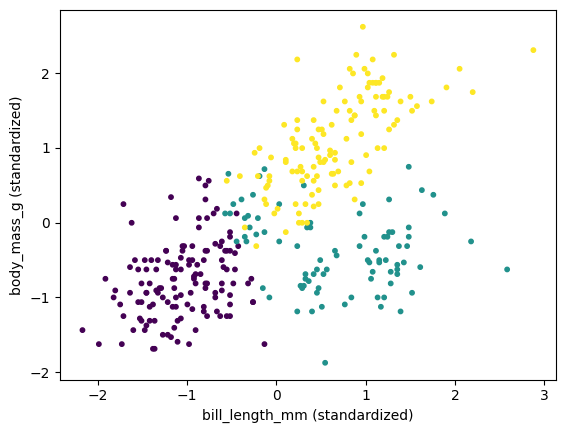

In [119]:
plt.scatter(X[:,0], X[:,3], c=assign, s=10)
plt.xlabel('bill_length_mm (standardized)')
plt.ylabel('body_mass_g (standardized)')
plt.show()

In [120]:
df_truth = pd.read_csv('penguins-species.csv')
df_truth = df_truth.iloc[df.index]
df_truth.head()

,species
0,Adelie
1,Adelie
2,Adelie
4,Adelie
5,Adelie


In [121]:
species = df_truth['species']
print(species.unique())

['Adelie' 'Chinstrap' 'Gentoo']


In [122]:
df_full = pd.concat([df, df_truth], axis=1)
df_full.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species
0,39.1,18.7,181.0,3750.0,Adelie
1,39.5,17.4,186.0,3800.0,Adelie
2,40.3,18.0,195.0,3250.0,Adelie
4,36.7,19.3,193.0,3450.0,Adelie
5,39.3,20.6,190.0,3650.0,Adelie


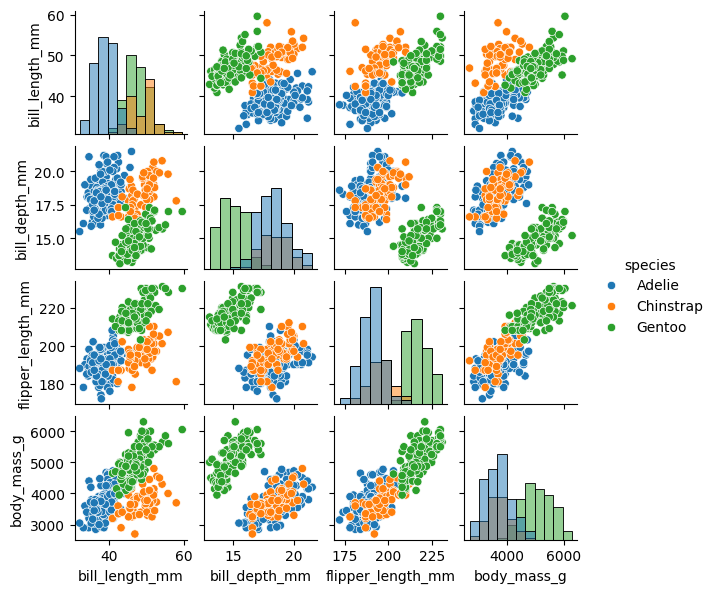

In [ ]:
import seaborn as sns
sns.pairplot(df_full, hue="species", diag_kind="hist",height=1.5)
plt.show()